# Step #1: Explore and prep data

https://www.youtube.com/watch?v=aLOQD66Sj0g

In [3]:
import pandas as pd

# please use the dataset bank-additional.zip and extract it
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
#print(df)

In [5]:
# list and drop columns that are less related to the target based on my judgment
cols_to_drop = ['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# at the same time, rename the columns so they are understandable. Please read the UCI page (https://archive.ics.uci.edu/ml/datasets/bank+marketing) for details

#.drop takes the dataset df and drops the columns, rest of the columns are renamed too.
df = df.drop(columns=cols_to_drop).rename(columns={'job': 'job_type', 'default': 'default_status', 
                                                   'housing': 'housing_loan_status', 'loan': 'personal_loan_status', 
                                                   'contact': 'contact_type', 'month': 'contact_month', 
                                                   'day_of_week': 'contact_day_of_week', 'campaign': 'num_contacts', 
                                                   'pdays': 'days_last_contact', 'previous': 'previous_contacts', 
                                                   'poutcome': 'previous_outcome', 
                                                   'y': 'result'
                                                    })
# convert the target to numerical values
df['result'] = df['result'].replace({'yes': 1, 'no': 0})

C:\Users\49682172\AppData\Local\Temp\ipykernel_77172\1436297663.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['result'] = df['result'].replace({'yes': 1, 'no': 0})


In [7]:
df.head()  #prints out the first five rows

,age,job_type,marital,education,default_status,housing_loan_status,personal_loan_status,contact_type,contact_month,contact_day_of_week,num_contacts,days_last_contact,previous_contacts,previous_outcome,result
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,0


In [9]:
df.info()  #info summary, 14 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   41188 non-null  int64 
 1   job_type              41188 non-null  object
 2   marital               41188 non-null  object
 3   education             41188 non-null  object
 4   default_status        41188 non-null  object
 5   housing_loan_status   41188 non-null  object
 6   personal_loan_status  41188 non-null  object
 7   contact_type          41188 non-null  object
 8   contact_month         41188 non-null  object
 9   contact_day_of_week   41188 non-null  object
 10  num_contacts          41188 non-null  int64 
 11  days_last_contact     41188 non-null  int64 
 12  previous_contacts     41188 non-null  int64 
 13  previous_outcome      41188 non-null  object
 14  result                41188 non-null  int64 
dtypes: int64(5), object(10)
memory usage

In [11]:
df['result'].value_counts()  #0 means rejection of the bank, 1 is acceptance

result
0    36548
1     4640
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='result')   #the result column, separation of features from target as X and Y
y = df['result']
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=5)  #changed to 0.5
print(X_train)

       age      job_type   marital            education default_status  \
21219   43    technician   married    university.degree             no   
25755   53   blue-collar   married             basic.9y             no   
185     57    management   married    university.degree             no   
8212    50     housemaid    single              unknown             no   
14965   37  entrepreneur  divorced          high.school        unknown   
...    ...           ...       ...                  ...            ...   
9810    46        admin.   married          high.school             no   
33008   37     housemaid  divorced             basic.9y        unknown   
9618    32    technician   married  professional.course             no   
31103   45     housemaid   married             basic.6y             no   
2743    45   blue-collar   married             basic.9y        unknown   

      housing_loan_status personal_loan_status contact_type contact_month  \
21219                 yes         

# Step #2: Build a pipeline of training

In [90]:
from sklearn.pipeline import Pipeline  
#sequentially applies a list of transforms and a final estimator
#assembles several steps that can be cross-validated
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),  #stardard preprocessing procedure
    ('clf', XGBClassifier(random_state=5)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)    
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=5, ...))])

# Step #3: Set up hyperparameter tuning

In [93]:
from skopt import BayesSearchCV   #could do gridsearch or randomsearch
from skopt.space import Real, Categorical, Integer
#clf is XGBClassifier name set before., this structure is important here..
search_space = {
    'clf__max_depth': Integer(2,8), #value of dictionary, size and range of hyperpar.
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}
 #this list is not exhaustive...
#cv crossvalidation folds, cv and n_iter could increase, low to take less time
opt = BayesSearchCV(pipe, search_space, cv=7, n_iter=10, scoring='roc_auc', random_state=5) #changed cv 3 to 7
# in reality, you may consider setting cv and n_iter to higher values

# Step #4: Train the XGBoost model

In [96]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=7,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [100]:
import xgboost as xgb
booster = xgb.train(search_space,train,num_boost_round=10, random_state=5)

NameError: name 'train' is not defined

# Step #5: Evaluate the model and make predictions

In [21]:
opt.best_estimator_

Pipeline(steps=[('encoder',
                 TargetEncoder(cols=['job_type', 'marital', 'education',
                                     'default_status', 'housing_loan_status',
                                     'personal_loan_status', 'contact_type',
                                     'contact_month', 'contact_day_of_week',
                                     'previous_outcome'])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.922570592908447,
                               colsample_bynode=0.5031569381466...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.5445629145642946, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=5, ...))])

In [22]:
opt.best_score_

0.7728383930461694

In [23]:
opt.score(X_test, y_test)

0.7666705664350707

In [24]:
opt.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [25]:
opt.predict_proba(X_test)

array([[0.37726527, 0.6227347 ],
       [0.7760399 , 0.22396009],
       [0.9264909 , 0.07350907],
       ...,
       [0.9162257 , 0.08377431],
       [0.9378308 , 0.06216922],
       [0.8948509 , 0.10514908]], dtype=float32)

In [116]:
#opt.optimizer_results_

# Step #6: Measure feature importance (optional)

In [28]:
opt.best_estimator_.steps

[('encoder',
  TargetEncoder(cols=['job_type', 'marital', 'education', 'default_status',
                      'housing_loan_status', 'personal_loan_status',
                      'contact_type', 'contact_month', 'contact_day_of_week',
                      'previous_outcome'])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.922570592908447,
                colsample_bynode=0.5031569381466442,
                colsample_bytree=0.7680703751882416, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=1.1605585879549765,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.5445629145642946,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missi

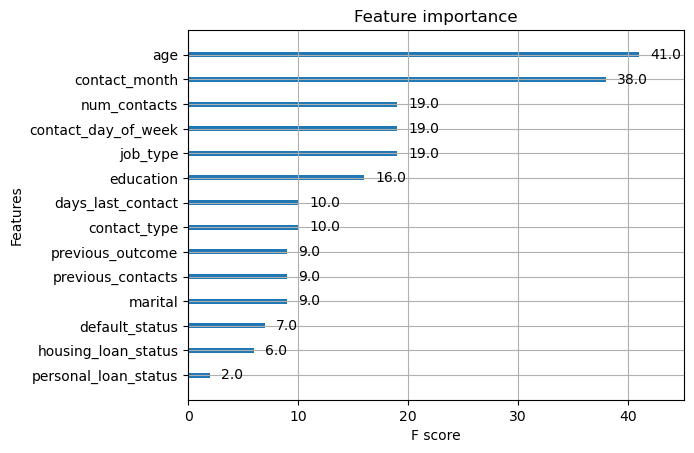

In [30]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)
plt.savefig('feature_importance_testsize0.5_randomstate_8.png')

In [32]:
print(type(df['age']))

<class 'pandas.core.series.Series'>


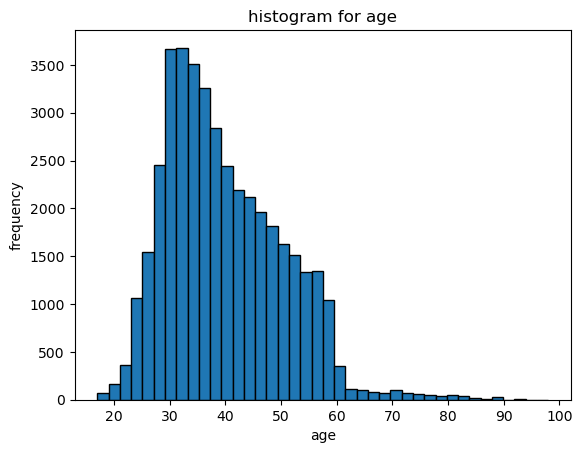

In [34]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=40, edgecolor='black')  # Adjust bins as needed
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('histogram for age')
plt.show()

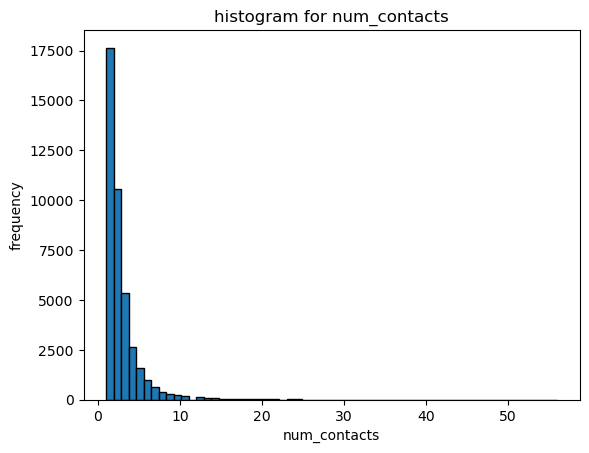

In [35]:
import matplotlib.pyplot as plt

plt.hist(df['num_contacts'], bins=60, edgecolor='black')  # Adjust bins as needed
plt.xlabel('num_contacts')
plt.ylabel('frequency')
plt.title('histogram for num_contacts')
plt.show()

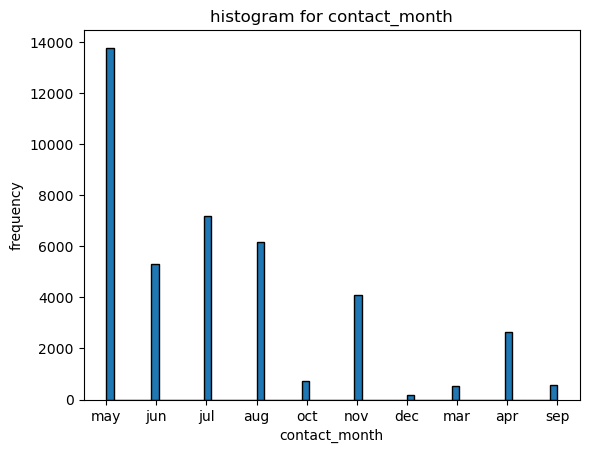

In [37]:
import matplotlib.pyplot as plt

plt.hist(df['contact_month'], bins=60, edgecolor='black')  # Adjust bins as needed
plt.xlabel('contact_month')
plt.ylabel('frequency')
plt.title('histogram for contact_month')
plt.show()

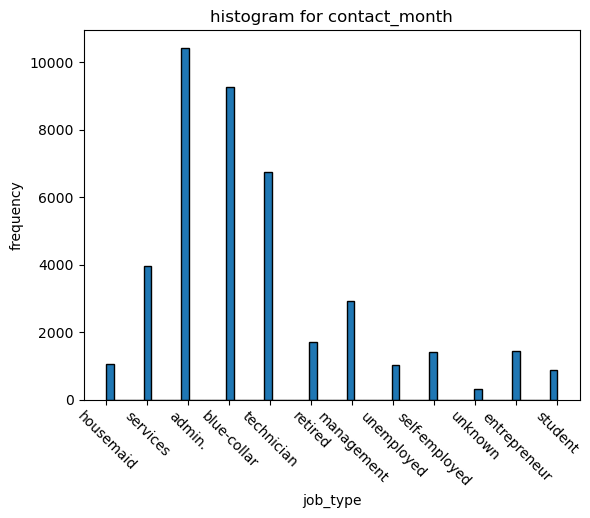

In [114]:
import matplotlib.pyplot as plt

plt.hist(df['job_type'], bins=60, edgecolor='black')  # Adjust bins as needed
plt.xlabel('job_type')
plt.xticks(rotation=-45)
plt.ylabel('frequency')
plt.title('histogram for contact_month')
plt.show()

In [67]:
# plot all predictions (both signal and background)
plt.figure();
plt.hist(age,bins=np.linspace(0,1,50),histtype='step',color='darkgreen',label='All events');
# make the plot readable
plt.xlabel('Prediction from BDT',fontsize=12);
plt.ylabel('Events',fontsize=12);
plt.legend(frameon=False);

# plot signal and background separately
plt.figure();
plt.hist(age[test.get_label().astype(bool)],bins=np.linspace(0,1,50),
         histtype='step',color='midnightblue',label='signal');
plt.hist(age[~(test.get_label().astype(bool))],bins=np.linspace(0,1,50),
         histtype='step',color='firebrick',label='background');
# make the plot readable
plt.xlabel('Prediction from BDT',fontsize=12);
plt.ylabel('Events',fontsize=12);
plt.legend(frameon=False);

NameError: name 'age' is not defined

<Figure size 640x480 with 0 Axes>